<a href="https://colab.research.google.com/github/BOLLOJUAISHWARYA/Google-collab-ANN/blob/main/Adadelta_optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_excel('Folds5x2_pp.xlsx',sheet_name='Sheet2')
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

In [ ]:
print(type(X))
print(Y)

<class 'numpy.ndarray'>
[481.3  465.36 465.48 ... 429.34 421.57 454.41]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
print(X_train)
print(X_test)
print(Y_train,Y_test)

[[  26.9    69.59 1008.9    85.08]
 [  20.47   58.16 1016.97   68.6 ]
 [  23.4    49.16 1002.85   69.82]
 ...
 [  15.92   37.64 1014.93   83.73]
 [  12.33   39.28 1011.84   80.01]
 [  25.32   54.5  1015.5    68.17]]
[[   5.52   39.33 1009.74   95.25]
 [  20.96   69.48 1011.04   82.63]
 [  11.76   39.28 1016.9    91.06]
 ...
 [  25.72   70.47 1010.44   70.57]
 [  13.     48.79 1017.14   85.23]
 [  20.52   57.76 1017.03   81.19]]
[434.1  453.99 446.05 ... 464.14 476.49 451.52] [492.39 444.31 478.07 ... 434.94 464.12 453.64]


In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1))

In [ ]:
ann.compile(loss='mean_absolute_error', optimizer='Adadelta')

In [ ]:
history=ann.fit(X_train, Y_train, batch_size = 64, epochs = 100)

Epoch 1/100
120/120 [==============================] - 1s 2ms/step - loss: 493.4648
Epoch 2/100
120/120 [==============================] - 0s 2ms/step - loss: 493.3008
Epoch 3/100
120/120 [==============================] - 0s 2ms/step - loss: 493.1277
Epoch 4/100
120/120 [==============================] - 0s 2ms/step - loss: 492.9467
Epoch 5/100
120/120 [==============================] - 0s 2ms/step - loss: 492.7590
Epoch 6/100
120/120 [==============================] - 0s 2ms/step - loss: 492.5661
Epoch 7/100
120/120 [==============================] - 0s 2ms/step - loss: 492.3683
Epoch 8/100
120/120 [==============================] - 0s 2ms/step - loss: 492.1658
Epoch 9/100
120/120 [==============================] - 0s 2ms/step - loss: 491.9590
Epoch 10/100
120/120 [==============================] - 0s 1ms/step - loss: 491.7482
Epoch 11/100
120/120 [==============================] - 0s 2ms/step - loss: 491.5332
Epoch 12/100
120/120 [==============================] - 0s 2ms/step - loss

In [ ]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(y_pred)
print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))

[[-156.58]
 [-153.28]
 [-158.03]
 ...
 [-154.6 ]
 [-157.47]
 [-156.25]]
[[-156.58  492.39]
 [-153.28  444.31]
 [-158.03  478.07]
 ...
 [-154.6   434.94]
 [-157.47  464.12]
 [-156.25  453.64]]


Text(0, 0.5, 'Loss')

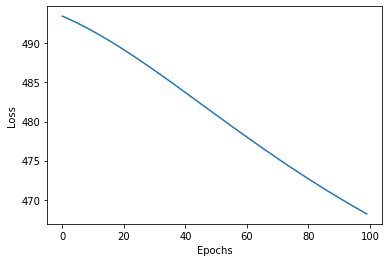

In [ ]:
plt.plot(history.history['loss'])

plt.xlabel("Epochs")
plt.ylabel("Loss")

In [ ]:
history.history

{'loss': [493.46478271484375,
  493.3007507324219,
  493.127685546875,
  492.9466552734375,
  492.759033203125,
  492.5660705566406,
  492.3682861328125,
  492.165771484375,
  491.9589538574219,
  491.7481689453125,
  491.533203125,
  491.3140869140625,
  491.09100341796875,
  490.8640441894531,
  490.63299560546875,
  490.39874267578125,
  490.1610412597656,
  489.9196472167969,
  489.675048828125,
  489.42730712890625,
  489.1761779785156,
  488.9222717285156,
  488.66510009765625,
  488.405517578125,
  488.1432189941406,
  487.8785400390625,
  487.6115417480469,
  487.3426818847656,
  487.0716857910156,
  486.7989807128906,
  486.5246276855469,
  486.2485656738281,
  485.9709777832031,
  485.6919860839844,
  485.4115295410156,
  485.1302185058594,
  484.84796142578125,
  484.5645751953125,
  484.28045654296875,
  483.99560546875,
  483.7100830078125,
  483.4242858886719,
  483.1376647949219,
  482.8510437011719,
  482.56427001953125,
  482.27740478515625,
  481.9904479980469,
  481.

Text(0, 0.5, 'Predicted values')

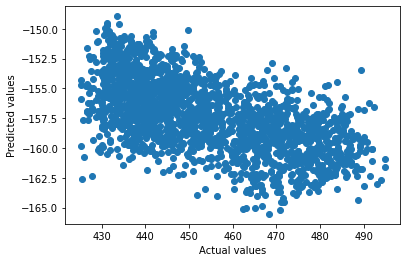

In [ ]:
plt.scatter(Y_test,y_pred)

plt.xlabel("Actual values")
plt.ylabel("Predicted values")

Error value is more